In [2]:
from autots import AutoTS, load_daily
df = load_daily(long=False)
df

,wiki_United_States,wiki_Germany,wiki_List_of_highest-grossing_films,wiki_Jesus,wiki_Michael_Jackson,wiki_List_of_United_States_cities_by_population,wiki_Microsoft_Office,wiki_Google_Chrome,wiki_Periodic_table,wiki_Standard_deviation,wiki_Easter,wiki_Christmas,wiki_Chinese_New_Year,wiki_Thanksgiving,wiki_List_of_countries_that_have_gained_independence_from_the_United_Kingdom,wiki_History_of_the_hamburger,wiki_Elizabeth_II,wiki_William_Shakespeare,wiki_George_Washington,wiki_Cleopatra,wiki_all
date,,,,,,,,,,,,,,,,,,,,,
2017-10-05,46611,16685,12892,10118,21092,11321,4065,16715,22547,15043,1717,4500,2735,8685,840,493,28334,14640,12673,7019,624492815
2017-10-06,44059,15310,13803,9182,20281,11181,3780,14658,17735,12609,1538,3778,1956,10537,690,439,26967,12494,10955,6653,592725882
2017-10-07,35962,13821,15437,8854,21537,10839,2870,11234,13003,7477,1360,3425,1603,10961,665,433,29819,10936,8665,6214,583742642
2017-10-08,38798,15194,17960,9775,21829,11364,3005,11320,14349,8578,1637,4069,1862,18314,702,441,35307,13982,10153,6759,630141190
2017-10-09,44848,16590,15809,10236,21075,12199,3754,14571,21264,14617,1791,4675,2347,30336,882,450,34548,16879,12196,7313,663937140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,62555,23923,18434,13029,24214,9309,28286,8162,39566,8145,1805,4862,2074,4673,1311,806,133625,14492,12939,199666,796662830
2022-09-30,58910,22586,15666,11885,24528,8794,85101,9078,23175,6579,1527,4670,1858,4569,1213,925,109458,12328,12012,206309,723868260
2022-10-01,49405,19138,17146,11687,25548,8156,112663,5708,15507,4848,1761,4514,1691,4731,1226,846,100259,11141,11969,207954,734010763


In [49]:
import yfinance

df = yfinance.download("MSFT",period="1y")
df = df[["Adj Close"]]
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2022-01-05,313.442993
2022-01-06,310.966217
2022-01-07,311.124725
2022-01-10,311.352570
2022-01-11,312.056000
...,...
2022-12-28,234.529999
2022-12-29,241.009995
2022-12-30,239.820007


In [50]:
df.to_excel("test.xlsx")

In [52]:
model = AutoTS(
    forecast_length=21,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list = ['ARIMA', 'FBProphet'],
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

In [53]:
model = model.fit(df)

Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model ARIMA in generation 0 of 4
Model Number: 2 with model ARIMA in generation 0 of 4
Model Number: 3 with model ARIMA in generation 0 of 4
Model Number: 4 with model FBProphet in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 4: FBProphet
Model Number: 5 with model FBProphet in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 5: FBProphet
Model Number: 6 with model ARIMA in generation 0 of 4
Model Number: 7 with model FBProphet in generation 0 of 4
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 7: FBProphet
Model Number: 8 with model ARIMA in generation 0 of 4
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 8: ARIMA
Model Number: 9 with model FBProphet in generation 0 of 4
Template Eval Error: Modu

In [54]:
prediction = model.predict(forecast_length=1000)

<AxesSubplot:title={'center':'Adj Close with model ARIMA'}>

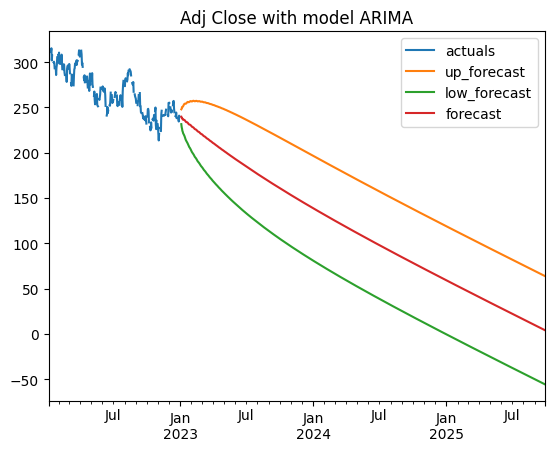

In [55]:
prediction.plot(model.df_wide_numeric,series=model.df_wide_numeric.columns[0])

In [45]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True
)

In [46]:
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True)

model.fit(df)

prediction = model.predict(forecast_length=15)

Inferred frequency is: None
Frequency is 'None'! Input frequency not recognized.
Model Number: 1 with model RRVAR in generation 0 of 4
Model Number: 2 with model MultivariateMotif in generation 0 of 4
Model Number: 3 with model WindowRegression in generation 0 of 4
Model Number: 4 with model SectionalMotif in generation 0 of 4
Model Number: 5 with model KalmanStateSpace in generation 0 of 4
Model Number: 6 with model SeasonalNaive in generation 0 of 4
Model Number: 7 with model LastValueNaive in generation 0 of 4
Model Number: 8 with model AverageValueNaive in generation 0 of 4
Model Number: 9 with model DatepartRegression in generation 0 of 4
Model Number: 10 with model UnivariateMotif in generation 0 of 4
Model Number: 11 with model MetricMotif in generation 0 of 4
Model Number: 12 with model ETS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model NVAR in generation 0 of 4
Model Number: 15 with model SeasonalityMotif in generation 0 o

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Model Number: 17 with model LastValueNaive in generation 1 of 4
Model Number: 18 with model SeasonalityMotif in generation 1 of 4
Model Number: 19 with model MultivariateMotif in generation 1 of 4
Model Number: 20 with model DatepartRegression in generation 1 of 4
Model Number: 21 with model GLS in generation 1 of 4
Model Number: 22 with model AverageValueNaive in generation 1 of 4
Model Number: 23 with model MetricMotif in generation 1 of 4
Model Number: 24 with model LastValueNaive in generation 1 of 4
Model Number: 25 with model RRVAR in generation 1 of 4
Model Number: 26 with model MultivariateMotif in generation 1 of 4
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 26: MultivariateMotif
Model Number: 27 with model SeasonalityMotif in generation 1 of 4
Model Number: 28 with model MetricMotif in generation 1 of 4
Model Number: 29 with model NVAR in generation 1 of 4
Model Number: 30 with model LastVa

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 33 with model ConstantNaive in generation 1 of 4
Model Number: 34 with model SectionalMotif in generation 1 of 4
Model Number: 35 with model LastValueNaive in generation 1 of 4
Model Number: 36 with model AverageValueNaive in generation 1 of 4
Model Number: 37 with model ETS in generation 1 of 4
Model Number: 38 with model DatepartRegression in generation 1 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 39 with model RRVAR in generation 1 of 4
Model Number: 40 with model AverageValueNaive in generation 1 of 4
Model Number: 41 with model LastValueNaive in generation 1 of 4
Model Number: 42 with model NVAR in generation 1 of 4
Model Number: 43 with model MultivariateMotif in generation 1 of 4
Model Number: 44 with model RRVAR in generation 1 of 4
Model Number: 45 with model DatepartRegression in generation 1 of 4
Model Number: 46 with model LastValueNaive in generation 1 of 4
Model Number: 47 with model LastValueNaive in generation 1 of 4
Model Number: 48 with model DatepartRegression in generation 1 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 48: DatepartRegression
Model Number: 49 with model KalmanStateSpace in generation 1 of 4
Model Number: 50 with model UnivariateMotif in generation 1 of 4
Model Number: 51 with model AverageValueNaive in generation 1 of 4
Model Number: 52 with model LastValueNaive in generatio

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\links.py:318: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:740: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning: invalid value encountered in 

Model Number: 75 with model RRVAR in generation 1 of 4
Model Number: 76 with model RRVAR in generation 1 of 4
Model Number: 77 with model DatepartRegression in generation 1 of 4
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 77: DatepartRegression
Model Number: 78 with model SectionalMotif in generation 1 of 4
Model Number: 79 with model NVAR in generation 1 of 4
Model Number: 80 with model SeasonalityMotif in generation 1 of 4
Model Number: 81 with model MetricMotif in generation 1 of 4
Model Number: 82 with model SeasonalityMotif in generation 1 of 4
Model Number: 83 with model ETS in generation 1 of 4
Model Number: 84 with model SectionalMotif in generation 1 of 4
Model Number: 85 with model UnivariateMotif in generation 1 of 4
Model Number: 86 with model ConstantNaive in generation 1 of 4
Model Number: 87 with model MetricMotif in generation 1 of 4
Model Number: 88 with model SectionalMotif in generation 1 of 4
Model N

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28040.881755153514, tolerance: 19.756998458512737
  positive)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28466.596583076516, tolerance: 19.958931115342743
  positive)


Model Number: 95 with model GLS in generation 1 of 4
Model Number: 96 with model SectionalMotif in generation 1 of 4
Model Number: 97 with model NVAR in generation 1 of 4
Model Number: 98 with model UnivariateMotif in generation 1 of 4
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 98: UnivariateMotif
Model Number: 99 with model MultivariateMotif in generation 1 of 4
Model Number: 100 with model NVAR in generation 1 of 4
Model Number: 101 with model MetricMotif in generation 1 of 4
Model Number: 102 with model DatepartRegression in generation 1 of 4


c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 103 with model UnivariateMotif in generation 1 of 4
Model Number: 104 with model MultivariateMotif in generation 1 of 4
Model Number: 105 with model RRVAR in generation 1 of 4
Model Number: 106 with model MetricMotif in generation 1 of 4
Model Number: 107 with model SeasonalNaive in generation 1 of 4
Model Number: 108 with model UnivariateMotif in generation 1 of 4
Model Number: 109 with model UnivariateMotif in generation 1 of 4
Model Number: 110 with model MultivariateMotif in generation 1 of 4
Model Number: 111 with model KalmanStateSpace in generation 1 of 4
Template Eval Error: AssertionError() in model 111: KalmanStateSpace
Model Number: 112 with model GLS in generation 1 of 4
Model Number: 113 with model AverageValueNaive in generation 1 of 4
Model Number: 114 with model SectionalMotif in generation 1 of 4
Model Number: 115 with model KalmanStateSpace in generation 1 of 4
Template Eval Error: AssertionError() in model 115: KalmanStateSpace
Model Number: 116 with mo

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Model Number: 122 with model SeasonalityMotif in generation 2 of 4
Model Number: 123 with model SeasonalityMotif in generation 2 of 4
Model Number: 124 with model SeasonalityMotif in generation 2 of 4
Model Number: 125 with model AverageValueNaive in generation 2 of 4
Model Number: 126 with model SeasonalNaive in generation 2 of 4
Model Number: 127 with model MultivariateMotif in generation 2 of 4
Model Number: 128 with model RRVAR in generation 2 of 4
Model Number: 129 with model MultivariateMotif in generation 2 of 4
Model Number: 130 with model NVAR in generation 2 of 4
Model Number: 131 with model LastValueNaive in generation 2 of 4
Model Number: 132 with model RRVAR in generation 2 of 4
Model Number: 133 with model UnivariateMotif in generation 2 of 4
Model Number: 134 with model SectionalMotif in generation 2 of 4
Model Number: 135 with model MetricMotif in generation 2 of 4
Model Number: 136 with model MultivariateMotif in generation 2 of 4
Model Number: 137 with model GLS in ge

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_regression.py:366: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 148 with model AverageValueNaive in generation 2 of 4
Model Number: 149 with model MultivariateMotif in generation 2 of 4
Model Number: 150 with model SeasonalityMotif in generation 2 of 4
Model Number: 151 with model RRVAR in generation 2 of 4
Model Number: 152 with model MultivariateMotif in generation 2 of 4
Model Number: 153 with model ETS in generation 2 of 4
Model Number: 154 with model LastValueNaive in generation 2 of 4
Model Number: 155 with model NVAR in generation 2 of 4
Model Number: 156 with model MetricMotif in generation 2 of 4
Model Number: 157 with model DatepartRegression in generation 2 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 770 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 770 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Model Number: 158 with model SectionalMotif in generation 2 of 4
Model Number: 159 with model MetricMotif in generation 2 of 4
Model Number: 160 with model DatepartRegression in generation 2 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 161 with model SeasonalNaive in generation 2 of 4
Model Number: 162 with model SeasonalNaive in generation 2 of 4
Model Number: 163 with model KalmanStateSpace in generation 2 of 4
Model Number: 164 with model MetricMotif in generation 2 of 4
Model Number: 165 with model UnivariateMotif in generation 2 of 4
Model Number: 166 with model ConstantNaive in generation 2 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 166: ConstantNaive
Model Number: 167 with model AverageValueNaive in generation 2 of 4
Model Number: 168 with model DatepartRegression in generation 2 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 169 with model MultivariateMotif in generation 2 of 4
Model Number: 170 with model GLM in generation 2 of 4
Model Number: 171 with model UnivariateMotif in generation 2 of 4


C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Model Number: 172 with model SeasonalityMotif in generation 2 of 4
Model Number: 173 with model SectionalMotif in generation 2 of 4
Model Number: 174 with model ConstantNaive in generation 2 of 4
Model Number: 175 with model RRVAR in generation 2 of 4
Model Number: 176 with model MetricMotif in generation 2 of 4
Model Number: 177 with model ConstantNaive in generation 2 of 4
Model Number: 178 with model SeasonalityMotif in generation 2 of 4
Model Number: 179 with model SeasonalityMotif in generation 2 of 4
Model Number: 180 with model NVAR in generation 2 of 4
Model Number: 181 with model ETS in generation 2 of 4
Model Number: 182 with model UnivariateMotif in generation 2 of 4
Model Number: 183 with model DatepartRegression in generation 2 of 4
Model Number: 184 with model DatepartRegression in generation 2 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 184: DatepartRegression
Model Number: 185 with model Cassandra in g

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\links.py:318: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:740: RuntimeWarning: invalid value encountered in true_divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:804: RuntimeWarning: invalid value encountered in 

Model Number: 203 with model UnivariateMotif in generation 2 of 4
Model Number: 204 with model DatepartRegression in generation 2 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 204: DatepartRegression
Model Number: 205 with model SeasonalityMotif in generation 2 of 4
Model Number: 206 with model UnivariateMotif in generation 2 of 4
Model Number: 207 with model AverageValueNaive in generation 2 of 4
Model Number: 208 with model UnivariateMotif in generation 2 of 4
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 208: UnivariateMotif
Model Number: 209 with model GLM in generation 2 of 4
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 209: GLM
Model Number: 210 with model NVAR in generation 2 of 4
Model Number: 211 with model AverageValueNaive in generation 2 of 4
Model Number: 21

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\links.py:318: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:740: RuntimeWarning: invalid value encountered in true_divide
  resid_dev

Model Number: 213 with model RRVAR in generation 2 of 4
Model Number: 214 with model SeasonalNaive in generation 2 of 4
Model Number: 215 with model NVAR in generation 2 of 4
Model Number: 216 with model MetricMotif in generation 2 of 4
Model Number: 217 with model MultivariateMotif in generation 2 of 4
Model Number: 218 with model MetricMotif in generation 2 of 4
Model Number: 219 with model DatepartRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 219: DatepartRegression
Model Number: 220 with model RRVAR in generation 2 of 4
Model Number: 221 with model AverageValueNaive in generation 2 of 4
Model Number: 222 with model GLS in generation 2 of 4
Model Number: 223 with model SectionalMotif in generation 2 of 4
Model Number: 224 with model GLS in generation 2 of 4
Model Number: 225 with model LastValueNaive in generation 2 of 4
Model Number: 226 with model MetricMotif in generation 2 of 4
New Generation: 3 

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Model Number: 227 with model SeasonalityMotif in generation 3 of 4
Model Number: 228 with model DatepartRegression in generation 3 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 229 with model ETS in generation 3 of 4
Model Number: 230 with model KalmanStateSpace in generation 3 of 4
Template Eval Error: AssertionError() in model 230: KalmanStateSpace
Model Number: 231 with model SectionalMotif in generation 3 of 4
Model Number: 232 with model DatepartRegression in generation 3 of 4
Model Number: 233 with model AverageValueNaive in generation 3 of 4
Model Number: 234 with model SeasonalNaive in generation 3 of 4
Model Number: 235 with model NVAR in generation 3 of 4
Model Number: 236 with model UnivariateMotif in generation 3 of 4
Model Number: 237 with model AverageValueNaive in generation 3 of 4
Model Number: 238 with model UnivariateMotif in generation 3 of 4
Model Number: 239 with model MultivariateMotif in generation 3 of 4
Model Number: 240 with model ConstantNaive in generation 3 of 4
Model Number: 241 with model NVAR in generation 3 of 4
Model Number: 242 with model SeasonalityMotif in generation 3 of 4
Model Number: 243 with model Metric

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 278 with model SeasonalityMotif in generation 3 of 4
Model Number: 279 with model LastValueNaive in generation 3 of 4
Model Number: 280 with model ETS in generation 3 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Adj Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 281 with model UnivariateMotif in generation 3 of 4
Model Number: 282 with model SeasonalNaive in generation 3 of 4
Model Number: 283 with model DatepartRegression in generation 3 of 4
Model Number: 284 with model AverageValueNaive in generation 3 of 4
Model Number: 285 with model SectionalMotif in generation 3 of 4
Model Number: 286 with model UnivariateMotif in generation 3 of 4
Model Number: 287 with model LastValueNaive in generation 3 of 4
Model Number: 288 with model MetricMotif in generation 3 of 4
Model Number: 289 with model NVAR in generation 

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Model Number: 295 with model SectionalMotif in generation 3 of 4
Model Number: 296 with model LastValueNaive in generation 3 of 4
Model Number: 297 with model AverageValueNaive in generation 3 of 4
Model Number: 298 with model KalmanStateSpace in generation 3 of 4
Model Number: 299 with model SeasonalityMotif in generation 3 of 4
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 299: SeasonalityMotif
Model Number: 300 with model DatepartRegression in generation 3 of 4
Model Number: 301 with model AverageValueNaive in generation 3 of 4
Model Number: 302 with model MultivariateMotif in generation 3 of 4
Model Number: 303 with model GLS in generation 3 of 4
Model Number: 304 with model ETS in generation 3 of 4
Model Number: 305 with model RRVAR in generation 3 of 4
Model Number: 306 with model SectionalMotif in generation 3 of 4
Model Number: 307 with model KalmanStateSpace in generation 3 of 4
Model Number: 308 with model MetricMotif in generation 3 

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_regression.py:366: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 318 with model DatepartRegression in generation 3 of 4
Model Number: 319 with model RRVAR in generation 3 of 4
Model Number: 320 with model RRVAR in generation 3 of 4
Model Number: 321 with model SectionalMotif in generation 3 of 4
Model Number: 322 with model UnivariateMotif in generation 3 of 4
Model Number: 323 with model RRVAR in generation 3 of 4
Model Number: 324 with model DatepartRegression in generation 3 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 325 with model WindowRegression in generation 3 of 4
Model Number: 326 with model GLS in generation 3 of 4
Model Number: 327 with model SeasonalityMotif in generation 3 of 4
Model Number: 328 with model MetricMotif in generation 3 of 4
Model Number: 329 with model GLS in generation 3 of 4
Model Number: 330 with model SectionalMotif in generation 3 of 4
Model Number: 331 with model MultivariateMotif in generation 3 of 4
New Generation: 4 of 4


c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Model Number: 332 with model ETS in generation 4 of 4
Model Number: 333 with model AverageValueNaive in generation 4 of 4
Model Number: 334 with model MultivariateMotif in generation 4 of 4
Model Number: 335 with model SectionalMotif in generation 4 of 4
Model Number: 336 with model LastValueNaive in generation 4 of 4
No anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 336: LastValueNaive
Model Number: 337 with model MetricMotif in generation 4 of 4
Model Number: 338 with model AverageValueNaive in generation 4 of 4
Model Number: 339 with model SectionalMotif in generation 4 of 4
Model Number: 340 with model MetricMotif in generation 4 of 4
Model Number: 341 with model AverageValueNaive in generation 4 of 4
Model Number: 342 with model GLS in generation 4 of 4
Model Number: 343 with model GLS in generation 4 of 4
Model Number: 344 with model MetricMotif in generation 4 of 4
Model Number: 345 with model MetricMotif in generation

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.33042e-25): result may not be accurate.
  overwrite_a=True).T


Model Number: 366 with model NVAR in generation 4 of 4
Model Number: 367 with model MetricMotif in generation 4 of 4
Model Number: 368 with model UnivariateMotif in generation 4 of 4
Model Number: 369 with model ETS in generation 4 of 4
Model Number: 370 with model MultivariateMotif in generation 4 of 4
Model Number: 371 with model DatepartRegression in generation 4 of 4
Model Number: 372 with model SectionalMotif in generation 4 of 4
Model Number: 373 with model LastValueNaive in generation 4 of 4
Model Number: 374 with model ETS in generation 4 of 4
Model Number: 375 with model DatepartRegression in generation 4 of 4
Model Number: 376 with model GLS in generation 4 of 4
Model Number: 377 with model UnivariateMotif in generation 4 of 4
Model Number: 378 with model RRVAR in generation 4 of 4
Model Number: 379 with model GLM in generation 4 of 4
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be repo

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 384 with model RRVAR in generation 4 of 4
Model Number: 385 with model SeasonalNaive in generation 4 of 4
Model Number: 386 with model MetricMotif in generation 4 of 4
Model Number: 387 with model UnivariateMotif in generation 4 of 4
Model Number: 388 with model MetricMotif in generation 4 of 4
Model Number: 389 with model AverageValueNaive in generation 4 of 4
Model Number: 390 with model ConstantNaive in generation 4 of 4
Model Number: 391 with model MAR in generation 4 of 4
Model Number: 392 with model RRVAR in generation 4 of 4
Model Number: 393 with model GLS in generation 4 of 4
Model Number: 394 with model WindowRegression in generation 4 of 4
Model Number: 395 with model DatepartRegression in generation 4 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 395: DatepartRegression
Model Number: 396 with model SectionalMotif in generation 4 of 4
Model Number: 397 with model NVAR in generation 4 of 4
Model Number: 39

C:\Users\sedat\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.


Model Number: 401 with model DatepartRegression in generation 4 of 4


[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 402 with model GLS in generation 4 of 4
Model Number: 403 with model UnivariateMotif in generation 4 of 4
Model Number: 404 with model WindowRegression in generation 4 of 4
Model Number: 405 with model SeasonalNaive in generation 4 of 4
Model Number: 406 with model RRVAR in generation 4 of 4
Model Number: 407 with model RRVAR in generation 4 of 4
Model Number: 408 with model MultivariateMotif in generation 4 of 4
Model Number: 409 with model UnivariateMotif in generation 4 of 4
Model Number: 410 with model SectionalMotif in generation 4 of 4
Model Number: 411 with model NVAR in generation 4 of 4
Model Number: 412 with model ETS in generation 4 of 4
Model Number: 413 with model ConstantNaive in generation 4 of 4
Model Number: 414 with model Cassandra in generation 4 of 4
Dropping zero variance feature columns Index(['seasonality7_6'], dtype='object')
Dropping multi-colinear feature columns Index(['seasonality365.25_0', 'seasonality365.25_1', 'seasonality365.25_2',
       '

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Model Number: 418 with model MultivariateMotif in generation 4 of 4
Model Number: 419 with model MultivariateMotif in generation 4 of 4
Model Number: 420 with model GLM in generation 4 of 4
Model Number: 421 with model SectionalMotif in generation 4 of 4
Model Number: 422 with model AverageValueNaive in generation 4 of 4
Model Number: 423 with model RRVAR in generation 4 of 4
Model Number: 424 with model LastValueNaive in generation 4 of 4
Model Number: 425 with model SectionalMotif in generation 4 of 4
Model Number: 426 with model AverageValueNaive in generation 4 of 4
Model Number: 427 with model MultivariateMotif in generation 4 of 4
Model Number: 428 with model GLS in generation 4 of 4
Model Number: 429 with model ETS in generation 4 of 4
Model Number: 430 with model DatepartRegression in generation 4 of 4
Model Number: 431 with model LastValueNaive in generation 4 of 4
Model Number: 432 with model SeasonalityMotif in generation 4 of 4
Model Number: 433 with model NVAR in generatio

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


36 - DatepartRegression with avg smape 3.86: 
Model Number: 37 of 85 with model LastValueNaive for Validation 1
37 - LastValueNaive with avg smape 6.7: 
Model Number: 38 of 85 with model SectionalMotif for Validation 1
38 - SectionalMotif with avg smape 5.71: 
Model Number: 39 of 85 with model DatepartRegression for Validation 1
39 - DatepartRegression with avg smape 3.12: 
Model Number: 40 of 85 with model MultivariateMotif for Validation 1
40 - MultivariateMotif with avg smape 6.25: 
Model Number: 41 of 85 with model MultivariateMotif for Validation 1
41 - MultivariateMotif with avg smape 3.17: 
Model Number: 42 of 85 with model RRVAR for Validation 1
42 - RRVAR with avg smape 2.29: 
Model Number: 43 of 85 with model UnivariateMotif for Validation 1
43 - UnivariateMotif with avg smape 2.2: 
Model Number: 44 of 85 with model AverageValueNaive for Validation 1
44 - AverageValueNaive with avg smape 4.1: 
Model Number: 45 of 85 with model SeasonalNaive for Validation 1
45 - SeasonalNaive

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    0.0s finished


36 - DatepartRegression with avg smape 3.61: 
Model Number: 37 of 85 with model LastValueNaive for Validation 2
37 - LastValueNaive with avg smape 4.86: 
Model Number: 38 of 85 with model SectionalMotif for Validation 2
38 - SectionalMotif with avg smape 4.41: 
Model Number: 39 of 85 with model DatepartRegression for Validation 2
39 - DatepartRegression with avg smape 5.56: 
Model Number: 40 of 85 with model MultivariateMotif for Validation 2
40 - MultivariateMotif with avg smape 3.3: 
Model Number: 41 of 85 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 41: MultivariateMotif
Model Number: 42 of 85 with model RRVAR for Validation 2
42 - RRVAR with avg smape 3.19: 
Model Number: 43 of 85 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 4

c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\sedat\anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


46 - DatepartRegression with avg smape 4.75: 
Model Number: 47 of 85 with model AverageValueNaive for Validation 2
47 - AverageValueNaive with avg smape 4.8: 
Model Number: 48 of 85 with model SeasonalNaive for Validation 2
48 - SeasonalNaive with avg smape 4.45: 
Model Number: 49 of 85 with model AverageValueNaive for Validation 2
49 - AverageValueNaive with avg smape 3.98: 
Model Number: 50 of 85 with model NVAR for Validation 2
50 - NVAR with avg smape 4.89: 
Model Number: 51 of 85 with model SeasonalNaive for Validation 2
51 - SeasonalNaive with avg smape 5.21: 
Model Number: 52 of 85 with model SeasonalNaive for Validation 2
52 - SeasonalNaive with avg smape 5.21: 
Model Number: 53 of 85 with model RRVAR for Validation 2
53 - RRVAR with avg smape 4.17: 
Model Number: 54 of 85 with model LastValueNaive for Validation 2
54 - LastValueNaive with avg smape 4.85: 
Model Number: 55 of 85 with model LastValueNaive for Validation 2
55 - LastValueNaive with avg smape 4.85: 
Model Number: 5

<AxesSubplot:title={'center':'Adj Close with model RRVAR'}>

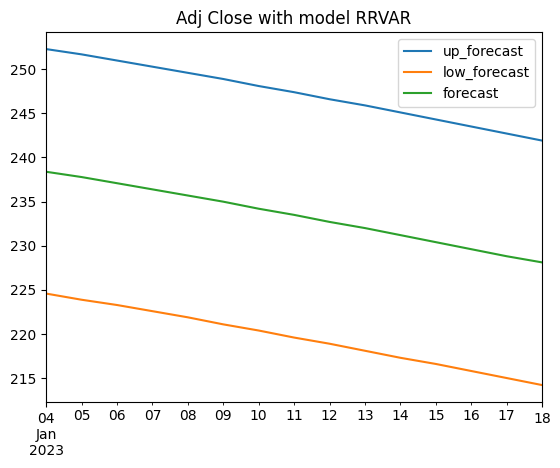

In [48]:
prediction.plot()